# **Random Forest**
1. noise=0.4인 1000개의 데이터셋을 생성합니다.
2. train_test_split() 을 사용해 훈련 셋과 테스트 셋으로 나눕니다.
'랜덤 포레스트'와 '엑스트라 트리'를 각각 생성하되, 트리 규제를 적어도 두 가지를 추가하여 동일 조건에서 두 트리를 생성하여 비교해 보세요. (트리는 500개로 고정합니다.)
3. 더 좋은 성능을 보이는 조합을 텍스트 셀을 추가하여 작성하세요.

In [9]:
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, BaggingClassifier

X, y = make_moons(n_samples=1000, noise=0.4, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

#### **Random Forest, Extra Tree 규제 사항**
**1. n_estimators : 500**
  - 앙상블에 사용될 트리 개수, 트리의 수가 많을 수록 모델 성능이 안정화되고 일반화 성능이 향상될 수 있음.
**2. max_depth : 10**
  - 트리의 최대 깊이
  - 트리의 최대 깊이를 제한을 통해 훈련데이터에 대한 과대적합을 방지할 수 있음.

**3. min_samples_split : 10**  🇰
  - 노드 분할을 위한 최소 샘플 수
  - min_samples_split을 늘리면 모델이 세부적으로 더이상 탐색하지않아 과대 적합을 방지 할수 있음.

**4. max_samples: 10**
  - 각 트리가 훈련과정에서 사용할 샘플 수, 비율
  - max_sample 수를 줄이면 과대적합을 줄일 수 있음.


----- 사용되지 않은 추가적인 규제 사항-----
1.  max_leaf_nodes
  - 하나의 트리가 가질 수 있는 최대 리프 노드 수
  - 최대 리프 노드 수를 제한하면 트리의 복잡도를 제어할 수 있고, 과대적합을 방지 할 수 있음. (최대 리프 노드 수가 적을 수록 과대 적합 가능성이 낮아짐)

2. max_features
  - 트리 분할 시 고려할 최대 특징 수
  - 분할 시 사용할 특징의 수를 제한하면 트리가 다양한 특징을 고려해 분할하기 때문에 과대적합을 방지할 수 있음.

3. ccp_alpha (Cost Complexity Pruning)
  - 가지치기 진행 시 설정할 비용복잡도 매개변수
  - 적절한 비용복잡도 매개변수를 사용하면 불필요한 노이즈를 제거해서 모델의 일반화 성능을 높일 수 있음.

In [18]:
# Random Forest 분류기 생성
rnd_clf = RandomForestClassifier(n_estimators=500, max_depth=10, min_samples_split=10, n_jobs=-1, random_state=42)
rnd_clf.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, min_samples_split=10, n_estimators=500,
                       n_jobs=-1, random_state=42)

In [19]:
# Extra Tree 분류기 생성
et_model = ExtraTreesClassifier(n_estimators=500, max_depth=10, min_samples_split=10, n_jobs=-1, random_state=42)
et_model.fit(X_train, y_train)


ExtraTreesClassifier(max_depth=10, min_samples_split=10, n_estimators=500,
                     n_jobs=-1, random_state=42)

In [20]:
# Prediction 비교
y_pred_rf = rnd_clf.predict(X_test)
y_pred_et = et_model.predict(X_test)


In [21]:
# Accuracy 비교
from sklearn.metrics import accuracy_score

rf_accuracy = accuracy_score(y_test, y_pred_rf)
et_accuracy = accuracy_score(y_test, y_pred_et)

print(f'Random Forest test accuracy: {rf_accuracy:.2f}')
print(f'Extra Tree test accuracy: {et_accuracy:.2f}')

Random Forest test accuracy: 0.86
Extra Tree test accuracy: 0.87


In [22]:
# Random Forest vs Extra Tree 분류기 최종 비교
accuracies = {'Random Forest': rf_accuracy, 'Extra Trees': et_accuracy}

better_model = max(accuracies, key=accuracies.get)
print(f"The better model : {better_model}")

The better model : Extra Trees


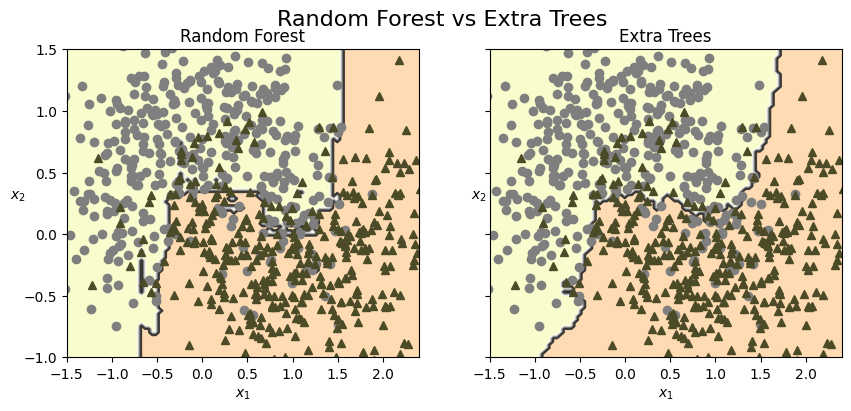

In [27]:
import matplotlib.pyplot as plt
import numpy as np

def plot_decision_boundary(clf, X, y, ax, alpha=1.0):
    axes = [-1.5, 2.4, -1, 1.5]
    x1, x2 = np.meshgrid(np.linspace(axes[0], axes[1], 100), np.linspace(axes[2], axes[3], 100))
    X_new = np.c_[x1.ravel(), x2.ravel()]
    y_pred = clf.predict(X_new).reshape(x1.shape)

    ax.contourf(x1, x2, y_pred, alpha=0.3, cmap='Wistia')
    ax.contour(x1, x2, y_pred, cmap='Greys', alpha=0.8)
    colors = ['#7f7f7f', '#4c4b27']
    markers = ['o', '^']
    for idx in [0, 1]:
        ax.plot(X[y == idx, 0], X[y == idx, 1], color=colors[idx], marker=markers[idx], linestyle='none', alpha=alpha)
    ax.axis(axes)
    ax.set_xlabel("$x_1$")
    ax.set_ylabel("$x_2$", rotation=0)

# 결정 경계 시각화
fig, axes = plt.subplots(ncols=2, figsize=(10, 4), sharey=True)
plot_decision_boundary(rnd_clf, X_train, y_train, axes[0])
plot_decision_boundary(et_model, X_train, y_train, axes[1])
axes[0].set_title("Random Forest")
axes[1].set_title("Extra Trees")
fig.suptitle("Random Forest vs Extra Trees", fontsize=16)
plt.show()

### **결정경계 비교**
- 랜덤 포레스트 결정 경계와 엑스트라 트리 결정 경계를 시각화하여 비교하였을 때,
엑스트라 트리의 결정 경계가 랜덤 포레스트 보다 더 규칙적이고, 덜 복잡한 형태를 띄고 있어 분할해야하는 클래스 간의 경계가 더 명확함을 확인할 수 있었다.
- 따라서, 결정경계 결과를 비교하였을 때, 랜덤 포레스트 분류기가 훈련데이터에 대해 높은 적합성을 보였고, 엑스트라 트리의 결정경계가 더 일반화 성능이 높다고 판단할 수 있다.

### **결과 분석**

동일한 트리 규제 파라미터를 사용하여 랜덤 포레스트 분류기와, 엑스트라 트리 분류기를 학습하고 Accuracy 결과를 평가하였을 때, 엑스트라 트리 분류기가 좋은 성능을 보였다.

랜덤 포레스트와 엑스트라 트리 모두 Decision Tree를 앙상블하는 학습 방법이지만, 랜덤 포레스트는 최적의 분할할을 찾기 위해 무작위로 선택된 특성의 하위 집합만 고려하고, 엑스트라 트리는 무작위성을 높이기 위해 추가적인 후보 특성을 사용해 무작위로 분할 한 후 최상의 분할을 찾는 방식으로 트리의 다양성을 고려한 학습을 진행한다.
따라서, 빠른 시간안에 더 많은 무작위 분할을 수행할 수 있는  엑스트라 트리 학습 방향의 특성과 과대적합 방지를 위한 규제 파라미터 max_depth, min_samples_split 조합으로 인해 엑스트라 트리의 분할 정확도가 높게 나온 것으로 분석할 수 있다.